### Animesh Deb
### Task 1 - Prediction using Supervised Machine Learning
### Objective - To create a Predictive Model to predict the score based on the hours of studies done by student

#### Importing the required libraries and packages

In [2]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing and reading the dataset

In [3]:
df=pd.read_csv("student_scores - student_scores.csv")
#checking the first 5 rows of the dataset
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking the shape of the dataset

df.shape

(25, 2)

In [6]:
# No null values in both the columns

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [ ]:
# No duplicate record found

In [8]:
# Checking the statistical details of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Checking the skewness, values more than 0.5 or less than -0.5 are considered as skewed

In [9]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

#### Exploratory Data Analysis - Univariate Analysis

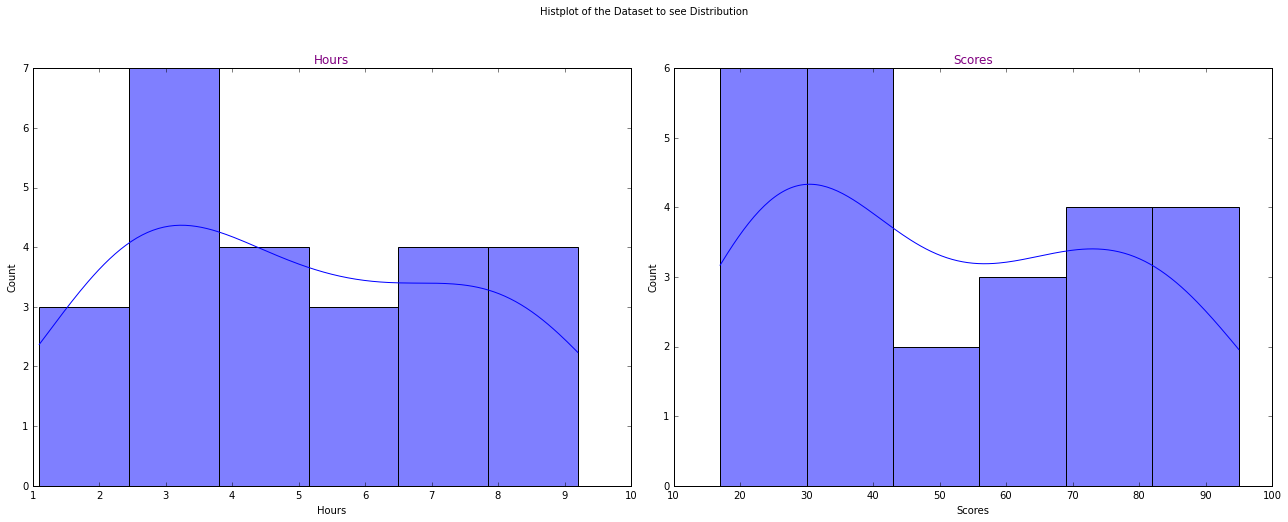

In [15]:
# Plotting Histplot to see if there are any outlier in any of the Columns


fig=plt.figure(figsize=(18,7))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.03)
for i in range(0,df.shape[1]):
    ax=fig.add_subplot(1,2,i+1)
    sns.histplot(df[df.columns[i]], kde = True)
    ax.set_title(df.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

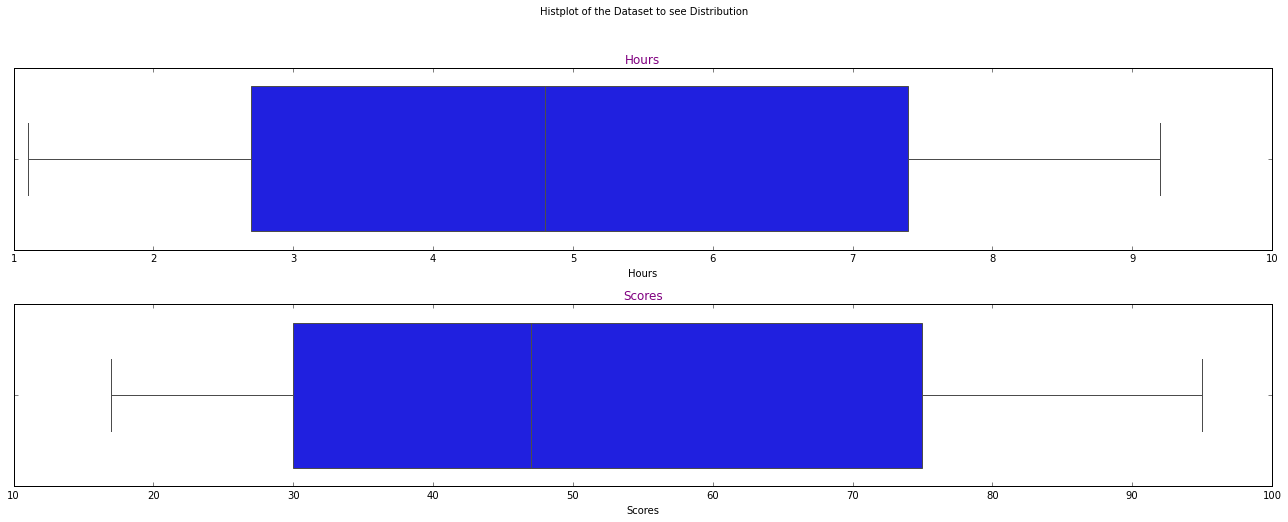

In [17]:
# Plotting Boxplot to see if there are any outlier in any of the Columns


fig=plt.figure(figsize=(18,7))
fig.suptitle('Histplot of the Dataset to see Distribution', y=1.03)
for i in range(0,df.shape[1]):
    ax=fig.add_subplot(2,1,i+1)
    sns.boxplot(df[df.columns[i]])
    ax.set_title(df.columns[i], color='purple')
    
plt.tight_layout()
plt.show()

In [ ]:
# No outlier present

#### Exploratory Data Analysis - Bivariate Analysis

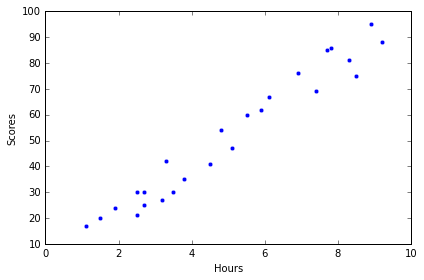

In [18]:
# Plotting scatter plot to view the correlation between the 2 numeric variable

fig.suptitle('Scatterplot of the Dataset to see correlation', y=1.03)

sns.scatterplot(y=df['Scores'], x=df['Hours'], data=df)
# ax.set_title('Price vs {}'.format(lg1.select_dtypes(exclude='object').columns[i]), color='purple')
    
plt.tight_layout()
plt.show()

In [ ]:
# Since only 2 variables are present in the dataset so Multivariate analysis is not applicable

In [ ]:
# Checking the corrleation coefficient and plotting the Correlation Heatmap

In [19]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
# The correlation coefficient shows highly positive correlation between Hours and Scores

<AxesSubplot:>

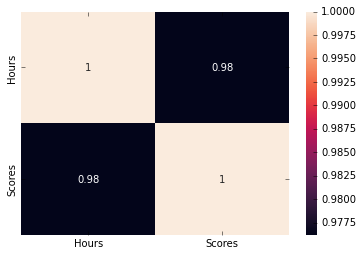

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
# Handling the rows with value = 0 

col_0 = list(df.columns)
for k in col_0:
    print(f'Count of 0 values in Column {k} is {df[df[k]==0][k].count()}')

Count of 0 values in Column Hours is 0
Count of 0 values in Column Scores is 0


#### Splitting the dataset into Train and Test in the ration of 70% to 30% for modelling

In [22]:
# Separating the dependent and independent variables

x = df.drop('Scores', axis=1)
y = df[['Scores']]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3 , random_state=1)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17, 1), (8, 1), (17, 1), (8, 1))

#### Linear Regression analysis  - Using Sklearn's Linear Regression method

In [27]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [28]:
 
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Hours is 10.410759810345233


In [29]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.5123061161277818



#### Model Evaluation

In [30]:
# R square on training data
RSqr_train = regression_model.score(x_train, y_train)
RSqr_train

0.9681980033905908

In [31]:
# R square on testing data
RSqr_test=regression_model.score(x_test, y_test)
RSqr_test

0.8933827573294114

In [66]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
RMSE_Train=np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
RMSE_Train

4.547610511690863

In [33]:
#RMSE on Testing data
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
RMSE_Test=np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
RMSE_Test

7.489481350911202

In [34]:
# Adjusted r - square value of Train data

Adj_r_sqr_Train = 1 - ((1-RSqr_train)*(len(x_train)-1)/(len(x_train)-x_train.shape[1]-1))
Adj_r_sqr_Train

0.9660778702832968

In [35]:
# Adjusted r - square value of Test data

Adj_r_sqr_Test = 1 - ((1-RSqr_test)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1))
Adj_r_sqr_Test

0.8756132168843134

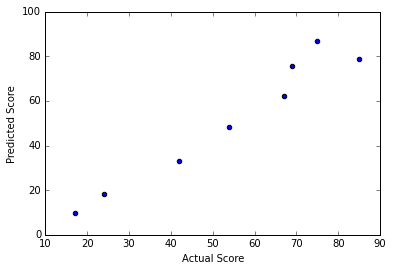

In [71]:
# Plotting the scatterplot of predicted test and actual test dataset
plt.scatter(y_test, predicted_test)

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

In [37]:
SklearnModel_performace = pd.DataFrame(data = [[RMSE_Train,RSqr_train,Adj_r_sqr_Train],[RMSE_Test,RSqr_test,Adj_r_sqr_Test]], columns = ['RMSE','R-Square','Adjusted R-Square'], index = ['Train Dataset','Test Dataset'])

In [38]:
SklearnModel_performace

,RMSE,R-Square,Adjusted R-Square
Train Dataset,4.547611,0.968198,0.966078
Test Dataset,7.489481,0.893383,0.875613


#### What will be the predicted score if a student studies for 9.25 hours per day

In [70]:
regression_model.predict([[9.25]])

array([[94.78722213]])

#### Linear Regression analysis  - Using Statsmodel method

In [39]:
# concatenate x and y into a single dataframe
df_train = pd.concat([x_train, y_train], axis=1)
df_test=pd.concat([x_test,y_test],axis=1)
df_train.head()

,Hours,Scores
4,3.5,30
2,3.2,27
20,2.7,30
6,9.2,88
7,5.5,60


In [40]:
df_train.columns

Index(['Hours', 'Scores'], dtype='object')

In [41]:
formula = 'Scores ~ Hours'

In [42]:
import statsmodels.formula.api as smf
df_statmodel_train = smf.ols(formula= formula, data = df_train).fit()
df_statmodel_train.params

Intercept    -1.512306
Hours        10.410760
dtype: float64

In [43]:
print(df_statmodel_train.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     456.7
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           1.21e-12
Time:                        00:07:01   Log-Likelihood:                -49.870
No. Observations:                  17   AIC:                             103.7
Df Residuals:                      15   BIC:                             105.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5123      2.691     -0.562      0.5

In [44]:
# RMSE for Train data
RMSE_Stat_Train = np.sqrt(df_statmodel_train.mse_resid)
RMSE_Stat_Train

4.841301086985475

In [62]:
# RMSE for Test data
MSE_Stat_Test = np.mean((df_statmodel_train.predict(df_test.drop('Scores',axis=1))-df_test['Scores'])**2)
RMSE_Stat_Test=  np.sqrt(MSE_Stat_Test)
RMSE_Stat_Test

7.489481350911209

In [47]:
# Prediction on Test data
y_pred = df_statmodel_train.predict(df_test)

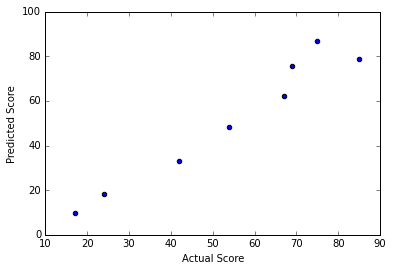

In [72]:
plt.scatter(df_test['Scores'], y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.show()

#### What will be the predicted score if a student studies for 9.25 hours per day

In [63]:
for i,j in np.array(df_statmodel_train.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1.51) * Intercept + (10.41) * Hours + 

#### Score = -1.51 + (10.41) * Hours

In [64]:
Score = -1.51 + (10.41) * 9.25
Score

94.7825